# First look at the data

**Example used: COVID-19 data**

Our World in Data provides COVID-19 public use data at https://ourworldindata.org/covid-cases. The dataset includes total cases and deaths, tests administered, hospital beds, and demographic data such as median age, gross domestic product, and a human development index, which is a composite measure of standard of living, educational levels, and life expectancy. The dataset used in this recipe was downloaded on March 3, 2024

## Read and inspect shape and data type
### Read data


In [ ]:
import pandas as pd
import numpy as np

# We first take a look at the data file, and understand that it is a CSV file with 28 KB on your disk

# read the file
covid_data = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"]) # note: Pandas can automatically infer standard date formats, such as ISO 8601 (YYYY-MM-DD), if you specify which columns contain dates.

### Inspect shape, columns

In [2]:
# Inspect the shape (numbers of rows and columns) of the dataframe.
# pd.shape returns a tuple representing the dimensionality of the DataFrame.
# it has 231 rows and 17 columns
covid_data.shape

(231, 17)

In [3]:
# Inspect the columns

print(f"This file include the following columns: {covid_data.columns}")

This file include the following columns: Index(['iso_code', 'lastdate', 'location', 'total_cases', 'total_deaths',
       'total_cases_pm', 'total_deaths_pm', 'population', 'pop_density',
       'median_age', 'gdp_per_capita', 'hosp_beds', 'vac_per_hund',
       'aged_65_older', 'life_expectancy', 'hum_dev_ind', 'region'],
      dtype='object')


### Inspect head, tail, and sample

In [ ]:
# Inspect some samples of the data, using head( ), tail ( ), or sample( )
print(f"The head of the dataset:\n")
print(covid_data.head())

In [15]:
print(f"The tail of the dataset:\n")
print(covid_data.tail(n=3)) # You can specify how many rows you wanted to inspect

The tail of the dataset:

    iso_code    lastdate  location  total_cases  total_deaths  total_cases_pm  \
228      YEM  2022-11-06     Yemen      11945.0        2159.0         354.487   
229      ZMB  2023-12-03    Zambia     349304.0        4069.0       17449.783   
230      ZWE  2024-01-28  Zimbabwe     266265.0        5737.0       16314.719   

     total_deaths_pm  population  pop_density  median_age  gdp_per_capita  \
228           64.072    33696612       53.508        20.3        1479.147   
229          203.270    20017670       22.995        17.7        3689.251   
230          351.520    16320539       42.729        19.6        1899.775   

     hosp_beds  vac_per_hund  aged_65_older  life_expectancy  hum_dev_ind  \
228        0.7           NaN          2.922            66.12        0.470   
229        2.0           NaN          2.480            63.89        0.584   
230        1.7           NaN          2.822            61.49        0.571   

              region  
228     

In [16]:
print(f"A random sample of the dataset:\n")
print(covid_data.sample())

A random sample of the dataset:

   iso_code    lastdate location  total_cases  total_deaths  total_cases_pm  \
21      BEN  2023-09-24    Benin      28036.0         163.0        2099.624   

    total_deaths_pm  population  pop_density  median_age  gdp_per_capita  \
21           12.207    13352864        99.11        18.8        2064.236   

    hosp_beds  vac_per_hund  aged_65_older  life_expectancy  hum_dev_ind  \
21        0.5           NaN          3.244            61.77        0.545   

         region  
21  West Africa  


In [17]:
print(f"A random sample of the datasets with 7 rows, with random seed 42")
print(covid_data.sample(n=7, random_state=42))

A random sample of the datasets with 7 rows, with random seed 42
    iso_code    lastdate                         location  total_cases  \
218      GBR  2024-01-28                   United Kingdom   24892903.0   
66       ETH  2023-12-03                         Ethiopia     501117.0   
9        ARM  2023-12-17                          Armenia     451426.0   
170      RUS  2024-01-28                           Russia   23774451.0   
15       BHR  2022-12-04                          Bahrain     696614.0   
200      SWE  2024-01-28                           Sweden    2749793.0   
25       BES  2023-07-09  Bonaire Sint Eustatius and Saba      11922.0   

     total_deaths  total_cases_pm  total_deaths_pm  population  pop_density  \
218      232112.0      368734.933         3438.241    67508936      272.898   
66         7574.0        4061.576           61.388   123379928      104.957   
9          8775.0      162355.888         3155.939     2780472      102.931   
170      401884.0      164

### Inspect data info and data types


In [5]:
# info also shows missing data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   iso_code         231 non-null    object        
 1   lastdate         231 non-null    datetime64[ns]
 2   location         231 non-null    object        
 3   total_cases      231 non-null    float64       
 4   total_deaths     231 non-null    float64       
 5   total_cases_pm   231 non-null    float64       
 6   total_deaths_pm  231 non-null    float64       
 7   population       231 non-null    int64         
 8   pop_density      209 non-null    float64       
 9   median_age       194 non-null    float64       
 10  gdp_per_capita   191 non-null    float64       
 11  hosp_beds        170 non-null    float64       
 12  vac_per_hund     13 non-null     float64       
 13  aged_65_older    188 non-null    float64       
 14  life_expectancy  227 non-null    float64  

In [26]:
covid_data.dtypes

iso_code                   object
lastdate           datetime64[ns]
location                   object
total_cases               float64
total_deaths              float64
total_cases_pm            float64
total_deaths_pm           float64
population                  int64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
vac_per_hund              float64
aged_65_older             float64
life_expectancy           float64
hum_dev_ind               float64
region                     object
dtype: object

### Checking missing data
use `.isna( )`

In [13]:
# Checking missing data for one column
covid_data['life_expectancy'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Name: life_expectancy, Length: 231, dtype: bool

In [14]:
# Because bool (True and False) are essentially integers (1 and 0)
# We can add them together to check how many True values (aka missing values, or nan values) there.
print(f"The number of missing values in the columns 'life_expectancy' is: {covid_data['life_expectancy'].isna().sum()}")

The number of missing values in the columns 'life_expectancy' is: 4


In [16]:
# Checking missing data for a DataFrame
covid_data.isna()

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind,region
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
227,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False
228,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
229,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [18]:
# Compute the number of missing data in each column in a DataFrame
covid_data.isna().sum()

pandas.core.series.Series

## Summary statistics (numerical)

using `.describe( )` to generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, *excluding* `NaN` values.


In [33]:
covid_data.describe() # generate a descriptive statistics for numerical columns

,lastdate,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind
count,231,2.310000e+02,2.310000e+02,231.000000,231.000000,2.310000e+02,209.000000,194.000000,191.000000,170.000000,13.000000,188.000000,227.00000,187.000000
mean,2023-09-11 22:32:43.636363520,3.351599e+06,3.021420e+04,206177.794623,1261.778390,3.424609e+07,323.603359,30.341753,18614.958990,3.014576,196.476923,8.675835,73.64652,0.721251
min,2020-10-18 00:00:00,4.000000e+00,0.000000e+00,354.487000,0.000000,4.700000e+01,0.137000,15.100000,661.240000,0.100000,38.470000,1.144000,53.28000,0.394000
25%,2023-06-07 12:00:00,2.567150e+04,1.775000e+02,21821.863000,141.177000,3.702075e+05,37.728000,22.050000,3821.198000,1.300000,155.720000,3.496750,69.54500,0.601500
50%,2023-12-03 00:00:00,1.914960e+05,1.937000e+03,133946.251000,827.046000,5.434324e+06,88.125000,29.600000,12236.706000,2.398500,214.070000,6.258500,75.05000,0.740000
75%,2024-01-28 00:00:00,1.294286e+06,1.415000e+04,345689.831000,1997.513000,2.197870e+07,222.873000,38.700000,27012.304500,3.965250,227.810000,13.990500,79.28500,0.828500
max,2024-02-04 00:00:00,1.034368e+08,1.127152e+06,763475.441000,6507.656000,1.425887e+09,19347.500000,48.200000,116935.600000,13.800000,406.390000,27.049000,86.75000,0.957000
std,NaN,1.148321e+07,1.047789e+05,203858.096252,1314.981529,1.376530e+08,1468.427340,9.117782,19470.167828,2.434476,96.305392,6.150235,7.42389,0.149669


In [34]:
covid_data.describe(percentiles=[0.05, 0.95])

,lastdate,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind
count,231,2.310000e+02,2.310000e+02,231.000000,231.000000,2.310000e+02,209.000000,194.000000,191.000000,170.000000,13.000000,188.000000,227.00000,187.000000
mean,2023-09-11 22:32:43.636363520,3.351599e+06,3.021420e+04,206177.794623,1261.778390,3.424609e+07,323.603359,30.341753,18614.958990,3.014576,196.476923,8.675835,73.64652,0.721251
min,2020-10-18 00:00:00,4.000000e+00,0.000000e+00,354.487000,0.000000,4.700000e+01,0.137000,15.100000,661.240000,0.100000,38.470000,1.144000,53.28000,0.394000
5%,2022-10-23 00:00:00,5.239000e+03,8.000000e+00,1638.859000,13.193000,1.428400e+04,5.245800,17.665000,1423.126500,0.500000,57.196000,2.482100,59.50500,0.462300
50%,2023-12-03 00:00:00,1.914960e+05,1.937000e+03,133946.251000,827.046000,5.434324e+06,88.125000,29.600000,12236.706000,2.398500,214.070000,6.258500,75.05000,0.740000
95%,2024-02-04 00:00:00,1.549251e+07,1.447630e+05,600293.033500,3749.868000,1.194695e+08,675.255200,44.140000,55543.458000,7.212500,324.538000,19.721900,82.98400,0.938000
max,2024-02-04 00:00:00,1.034368e+08,1.127152e+06,763475.441000,6507.656000,1.425887e+09,19347.500000,48.200000,116935.600000,13.800000,406.390000,27.049000,86.75000,0.957000
std,NaN,1.148321e+07,1.047789e+05,203858.096252,1314.981529,1.376530e+08,1468.427340,9.117782,19470.167828,2.434476,96.305392,6.150235,7.42389,0.149669


In [6]:
# We could also use description on one series
covid_data['total_cases'].describe()

count    2.310000e+02
mean     3.351599e+06
std      1.148321e+07
min      4.000000e+00
25%      2.567150e+04
50%      1.914960e+05
75%      1.294286e+06
max      1.034368e+08
Name: total_cases, dtype: float64

In [35]:
# You can also use .min(), .max(), .mean(), etc to check those summary statistics of each column
covid_data.min()

iso_code                           ABW
lastdate           2020-10-18 00:00:00
location                   Afghanistan
total_cases                        4.0
total_deaths                       0.0
total_cases_pm                 354.487
total_deaths_pm                    0.0
population                          47
pop_density                      0.137
median_age                        15.1
gdp_per_capita                  661.24
hosp_beds                          0.1
vac_per_hund                     38.47
aged_65_older                    1.144
life_expectancy                  53.28
hum_dev_ind                      0.394
region                       Caribbean
dtype: object

## Summary statistics (categorical)

Example used: nls97 data

The NLS of Youth was conducted by the United States Bureau of Labor Statistics. This survey started with a cohort of individuals in 1997 who were born between 1980 and 1985, with annual follow-ups each year through to 2023. For this recipe, I pulled 89 variables on grades, employment, income, and attitudes toward government from the hundreds of data items in the survey. Separate files for SPSS, Stata, and SAS can be downloaded from the repository. The NLS data can be downloaded from https://www.nlsinfo.org. You must create an investigator account to download the data, but there is no charge.

In [8]:
import pandas as pd

# read the data
nls97 = pd.read_csv("data/nls97.csv")


In [9]:
# inspect the size
nls97.shape

(8984, 89)

In [10]:
# inspect the information
nls97.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   personid               8984 non-null   int64  
 1   gender                 8984 non-null   object 
 2   birthmonth             8984 non-null   int64  
 3   birthyear              8984 non-null   int64  
 4   highestgradecompleted  6663 non-null   float64
 5   maritalstatus          6672 non-null   object 
 6   childathome            4791 non-null   float64
 7   childnotathome         4791 non-null   float64
 8   wageincome             5091 non-null   float64
 9   weeklyhrscomputer      5792 non-null   object 
 10  weeklyhrstv            6711 non-null   object 
 11  nightlyhrssleep        6706 non-null   float64
 12  satverbal              1406 non-null   float64
 13  satmath                1407 non-null   float64
 14  gpaoverall             6004 non-null   float64
 15  gpae

### without converting to Pandas `category` dtype

When dealing with categorical data type, we can convert it to `category` data type, but we don't have to. The advantage of converting to `category` data type is for memory efficiency.

If you don't convert it to `category` dtype, you can directly use `.value_counts( )` and `.describe( )` to inspect the frequency of categories and summary statistics.

In [20]:
nls97['gender'].value_counts(dropna=False) # dropna=False means count NaN as a separate category

gender
Male      4599
Female    4385
Name: count, dtype: int64

In [24]:
# Use .describe( ) to print summary statistics of this categorical variable
nls97['gender'].describe()

count     8984
unique       2
top       Male
freq      4599
Name: gender, dtype: object

In [27]:
# If you want to inspect the frequency in terms of percentage, you can pass normalize=True
nls97['gender'].value_counts(normalize=True)

gender
Male      0.51191
Female    0.48809
Name: proportion, dtype: float64

### Converting to Pandas `category` dtype
- using `astype("category")` to convert a column (Series) to a categorical dtype
- Then you can use `.value_counts()` and `.describe()` to inspect the frequency of categories and the summary statistics of this columns
- As you can see, the results are the same with if you don't convert it to `category` dtype.
- The only difference is that a `category` dtype takes less memory than an `object` (`str`) dtype in Pandas.

In [21]:
# first convert gender to a categorical dtype
# If you would like to keep the original column, you can create a new column
nls97['gender_category'] = nls97['gender'].astype("category")

In [25]:
nls97['gender_category'].value_counts()

gender_category
Male      4599
Female    4385
Name: count, dtype: int64

In [26]:
nls97['gender_category'].describe()

count     8984
unique       2
top       Male
freq      4599
Name: gender_category, dtype: object

### [Optional] Other methods I found helpful for categorical data
#### `pd.crosstab`
Cross-Tabulation (Compare Two Categorical Variables)

In [33]:
# If you want to inspect both the gender and marital status
pd.crosstab(nls97["gender"], nls97["maritalstatus"],
            dropna=False, normalize=False)


maritalstatus,Divorced,Married,Never-married,Separated,Widowed,NaN
gender,,,,,,
Female,0.043744,0.182102,0.145481,0.008793,0.002115,0.105855
Male,0.030053,0.159172,0.162400,0.008348,0.000445,0.151492


#### `df.groupby`
We will talk about `groupby` in more detail in our later weeks, but it can also be helpful in inspecting categorical data

In [34]:
# For example, if you want to inspect the mean wage income of male and female
nls97.groupby(by='gender')['wageincome'].mean()

gender
Female    41278.920243
Male      57202.818390
Name: wageincome, dtype: float64

#### One-hot encoding categorical data

we can also convert categorical to a collection of binary variables using a technique called "one-hot encoding"

One-hot encoding is a data pre-processing technique that converts categorical data into a binary matrix (0s and 1s), representing each category as a unique vector with a single "hot" (1) value and the rest "cold" (0). It enables machine learning algorithms to process nominal data by creating new binary columns for each distinct category.

In [62]:
nls97['is_female'].value_counts()

is_female
0    4599
1    4385
Name: count, dtype: int64

In [65]:
# a more generic way to do one-hot encoding is to use pd.get_dummies(). However, get_dummies() will automatically drop the original columns. for example:
nls97_copy = nls97.copy()
nls97_copy = pd.get_dummies(nls97_copy, columns=['maritalstatus'], drop_first=True, dummy_na=False, dtype=int) # always drop_first


## [Optional] Summary statistics of datetime data

Datetime data is not “categorical” or “numerical”, it’s temporal, and we inspect it differently.

Before we inspect, it is better to convert it to `pandas`'s datetime type.

In [36]:
# first check the type of the datetime columns, if it object, convert it to datetime (e.g., df["date"] = pd.to_datetime(df["date"])).
# As you can se, the dtype of "lastdate" is M8[ns], which is a data type string used in the Python NumPy and pandas libraries to represent a datetime64 object with nanosecond precision.

covid_data['lastdate'].dtype


dtype('<M8[ns]')

In [37]:
covid_data['lastdate'].describe()

count                              231
mean     2023-09-11 22:32:43.636363520
min                2020-10-18 00:00:00
25%                2023-06-07 12:00:00
50%                2023-12-03 00:00:00
75%                2024-01-28 00:00:00
max                2024-02-04 00:00:00
Name: lastdate, dtype: object

In [38]:
# range of time, useful to understand the duration of time
covid_data['lastdate'].max() - covid_data['lastdate'].min()

Timedelta('1204 days 00:00:00')

In [51]:
# Extract Temporal Components
covid_data['last_year'] = covid_data['lastdate'].dt.year
covid_data['last_month'] = covid_data['lastdate'].dt.month
covid_data['last_day'] = covid_data['lastdate'].dt.day
covid_data['last_day_of_week'] = covid_data['lastdate'].dt.dayofweek
covid_data['last_day_name'] = covid_data['lastdate'].dt.day_name()
covid_data['last_hour'] = covid_data['lastdate'].dt.hour


In [53]:
covid_data['last_day_name'].value_counts()

last_day_name
Sunday    231
Name: count, dtype: int64

<Axes: xlabel='lastdate'>

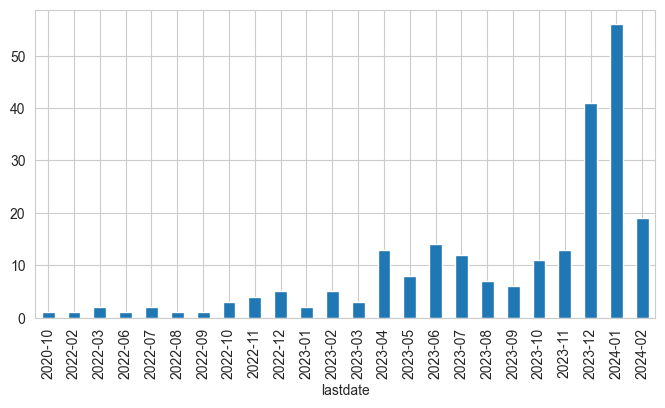

In [60]:
covid_data.groupby(covid_data["lastdate"].dt.to_period("M")).size().plot(kind='bar', figsize=(8, 4))